# Entrada das imagens

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import math

image = cv2.imread('images.jpeg')
image2 = cv2.imread('imagem1.png')
image4 = cv2.imread('1361_86350.jpg')

print("width: {} pixels".format(image.shape[0]))
print("height: {}  pixels".format(image.shape[1]))
print("Image: {}".format(type(image)))

width: 178 pixels
height: 178  pixels
Image: <class 'numpy.ndarray'>


# Operações de Imagem

In [20]:
def transform_negative_image(new_image):
  if len(new_image.shape) == 3:
    for i in range(new_image.shape[0]):
      for j in range(new_image.shape[1]):
        (R, G, B) = new_image[i,j]
        R = 255 - R
        G = 255 - G
        B = 255 - B
        new_image[i,j] = (R, G, B)
  elif len(new_image.shape) == 2:
    (h, w) = new_image.shape
    for i in range(h):
      for j in range(w):
        new_image[i, j] = 255-new_image[i, j]  
  
  return new_image

In [21]:
def gama_correction(new_image=None, gama=None):
  if len(new_image.shape) == 3:
    for i in range(new_image.shape[0]):
      for j in range(new_image.shape[1]):
        (R, G, B) = new_image[i,j]
        #RED.----
        R = R / 255
        V_out = R ** (1/gama)
        R = V_out * 255
        #GREN----
        G = G / 255
        V_out = G ** (1/gama)
        G = V_out * 255
        #BLUE----
        B = B / 255
        V_out = B ** (1/gama)
        B = V_out * 255

        new_image[i,j] = (R, G, B)

  elif len(new_image.shape) == 2:
    (h, w) = new_image.shape
    for i in range(h):
      for j in range(w):
        pixel = new_image[i,j]
        #PIXEL
        pixel = pixel / 255
        V_out = pixel ** (1/gama)
        pixel = V_out * 255
        new_image[i,j] = pixel

  return new_image

In [22]:
def logarithm_operator(new_image=None):
  if len(new_image.shape) == 3:
    c = 255 / np.log(1 + np.max(new_image))
    for i in range(new_image.shape[0]):
      for j in range(new_image.shape[1]):
        (R, G, B) = new_image[i,j]
        # Apply log transformation method
        R = c * (np.log(R + 1)) # R 
        G = c * (np.log(G + 1)) # R 
        B = c * (np.log(B + 1)) # R 

        new_image[i,j] = (R, G, B)

  elif len(new_image.shape) == 2:
    (h, w) = new_image.shape
    c = 255 / np.log(1 + np.max(new_image))
    for i in range(h):
      for j in range(w):
        pixel = new_image[i,j]
        new_image[i,j] = c * (np.log(pixel + 1))

  return new_image

In [23]:
def exponential_operator(new_image=None):
    c = 255 / np.log(1 + np.max(new_image), dtype=np.float64)

    if len(new_image.shape) == 2:
        for i in range(new_image.shape[0]):
            for j in range(new_image.shape[1]):
                new_image[i,j] = c * math.exp(1 + new_image[i,j])
    elif len(new_image.shape) == 3:
        for i in range(new_image.shape[0]):
            for j in range(new_image.shape[1]):
                (R, G, B) = new_image[i,j]
                R = c * math.exp(1 + R)
                G = c * math.exp(1 + G)
                B = c * math.exp(1 + B)
                new_image[i,j] = (R, G, B)

    return new_image

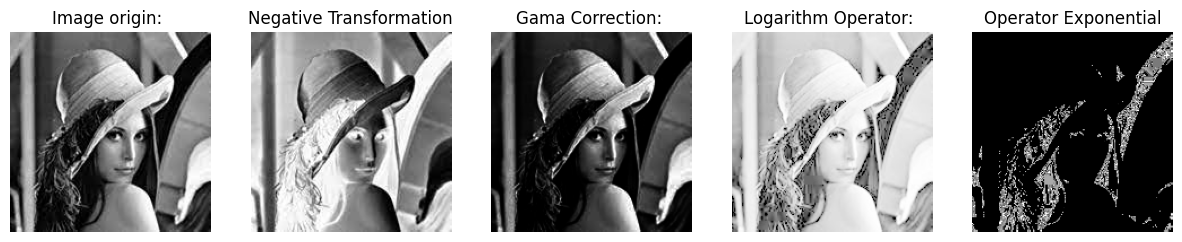

In [24]:
origin = image.copy()

image_transform_negative = transform_negative_image(origin.copy())
image_gama = gama_correction(origin.copy(), gama=0.5)
image_logarith = logarithm_operator(origin.copy())
image_exponential_operator = exponential_operator(origin.copy())

fig, axs = plt.subplots(1, 5, figsize=(15, 5))

axs[0].imshow(origin)
axs[0].set_title('Image origin: ')
axs[0].axis('off')

axs[1].imshow(image_transform_negative)
axs[1].set_title('Negative Transformation')
axs[1].axis('off')

axs[2].imshow(image_gama)
axs[2].set_title('Gama Correction: ')
axs[2].axis('off')

axs[3].imshow(image_logarith)
axs[3].set_title('Logarithm Operator: ')
axs[3].axis('off')

axs[4].imshow(image_exponential_operator)
axs[4].set_title('Operator Exponential')
axs[4].axis('off')


plt.show()

# Operações Lógica

In [25]:
def logical_operator(imageA=None, imageB=None, operation="AND"):
  # Operations {NOT, AND, OR, AND-NOT, XOR}
  try:
      A, B = imageA.shape
  except ValueError:
      A, B, C = imageA.shape


  new_image = np.zeros((A, B), dtype=np.uint8) 
  for i in range(A):
    for j in range(B):
      pixel_image_a = imageA[i,j]
      pixel_image_b = imageB[i,j]
      if operation == "AND":
        new_image[i,j] = (pixel_image_a and pixel_image_b)
      elif operation == "OR":
        new_image[i,j] = (pixel_image_a or pixel_image_b)
      elif operation == "XOR":
        new_image[i,j] = (pixel_image_a ^ pixel_image_b)
      elif operation == "NOT_A":
        new_image[i,j] = (not pixel_image_a)
      elif operation == "NOT_B":
        new_image[i,j] = (not pixel_image_b)
      elif operation == "NOT_AND":
        new_image[i,j] = (not pixel_image_a) and pixel_image_b

  return new_image

In [26]:
def return_circle():# Dimensões da imagem
  nrows = 500
  ncols = 500

  # Centro do círculo
  x0 = nrows//2
  y0 = ncols//2

  # Raio do círculo
  radius = 100

  # Matriz de imagem binária
  image = np.zeros((nrows, ncols), dtype=np.uint8)
  
  # Laço de repetição para desenhar o círculo
  for x in range(-radius, radius+1):
      for y in range(-radius, radius+1):
          if x**2 + y**2 <= radius**2:
              image[x0+x, y0+y] = 1

  # Visualização da imagem
  return image
  plt.imshow(image, cmap='binary')
  plt.show()

def return_square():
  # Dimensões da imagem
  nrows = 500
  ncols = 500

  # Tamanho do quadrado
  square_size = 100

  # Coordenadas do centro do quadrado
  x0 = nrows//2
  y0 = ncols//2

  # Matriz de imagem binária
  image = np.zeros((nrows, ncols), dtype=np.uint8)

  # Laço de repetição para desenhar o quadrado
  for i in range(x0 - square_size//2, x0 + square_size//2):
      for j in range(y0 - square_size//2, y0 + square_size//2):
          image[i, j] = 1

  return image

def return_start():
  nrows = 500
  ncols = 500
  # Centro da estrela
  x0 = nrows//2
  y0 = 3*ncols//4

  # Tamanho da estrela
  star_size = 100

  # Matriz de imagem binária para a estrela
  star = np.zeros((nrows, ncols), dtype=np.uint8)

  # Laço de repetição para desenhar a estrela
  for x in range(-star_size, star_size+1):
      for y in range(-star_size, star_size+1):
          if abs(x) + abs(y) <= star_size and (abs(x) + abs(y)) % 2 == 0:
              star[x0+x, y0+y] = 1

  return star

In [27]:
circle = return_circle()
square = return_square()
star = return_start()

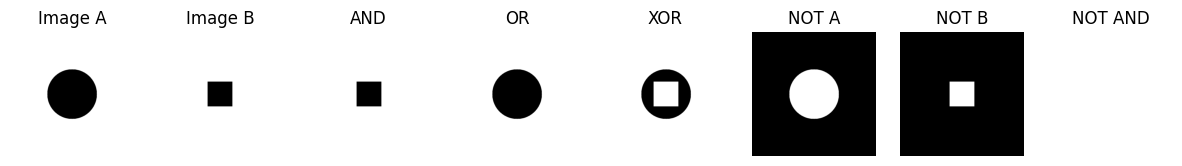

In [28]:
imageA = circle.copy()
imageB = square.copy()


image_and = logical_operator(imageA, imageB, operation="AND")
image_or = logical_operator(imageA, imageB, operation="OR")
image_xor = logical_operator(imageA, imageB, operation="XOR")
image_nota = logical_operator(imageA, imageB, operation="NOT_A")
image_notb = logical_operator(imageA, imageB, operation="NOT_B")
image_notand = logical_operator(imageA, imageB, operation="NOT_AND")



fig, axs = plt.subplots(1, 8, figsize=(15, 5))

axs[0].imshow(imageA, cmap='binary')
axs[0].set_title('Image A')


axs[1].imshow(imageB, cmap='binary')
axs[1].set_title('Image B')


axs[2].imshow(image_and, cmap='binary')
axs[2].set_title('AND')


axs[3].imshow(image_or, cmap='binary')
axs[3].set_title('OR')


axs[4].imshow(image_xor, cmap='binary')
axs[4].set_title('XOR')


axs[5].imshow(image_nota, cmap='binary')
axs[5].set_title('NOT A')


axs[6].imshow(image_notb, cmap='binary')
axs[6].set_title('NOT B')


axs[7].imshow(image_notand, cmap='binary')
axs[7].set_title('NOT AND')


for i in range(8):
  axs[i].axis('off')

plt.show()

# Operações Aritmétricas

In [29]:
def normalizar(image):
  image_copy = image.copy()
  fmax = image.max()
  fmin = image.min()
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      image_copy[i,j] = ( 255 / (fmax - fmin) ) * (image[i,j] - fmin)

  return image_copy


def arithmetic_operator(imageA=None, imageB=None, operation="+"):
  # Operations {NOT, AND, OR, AND-NOT, XOR}
  new_image = imageA.copy() 
  try:
      A, B = imageA.shape
  except ValueError:
      A, B, C = imageA.shape
  for i in range(A):
    for j in range(B):
      pixel_image_a = imageA[i,j]
      pixel_image_b = imageB[i,j]
      new_pixel = None
      
      if operation == "+":
        new_image[i,j] = (pixel_image_a + pixel_image_b)
      elif operation == "-":
        new_image[i,j] = (pixel_image_a - pixel_image_b)
      elif operation == "*":
        new_image[i,j] = (pixel_image_a * pixel_image_b)
      elif operation == "/":
        new_image[i,j] = (pixel_image_a / pixel_image_b)
      elif operation == "**":
        new_image[i,j] = (pixel_image_a ** pixel_image_b)
      elif operation == "^":
        new_image[i,j] = (pixel_image_a + pixel_image_b)**.5
      elif operation == "^^":
        new_image[i,j] = ( (pixel_image_a ** .5) + (pixel_image_b **.5 ) )
      elif operation == "log":
        new_image[i,j] = ( np.log2(pixel_image_a ** .5) + (pixel_image_b **.5 ) )

  new_image = normalizar(new_image)
  return new_image

<ipython-input-29-3b7a3b429e8e>:32: RuntimeWarning: divide by zero encountered in true_divide
  new_image[i,j] = (pixel_image_a / pixel_image_b)
<ipython-input-29-3b7a3b429e8e>:32: RuntimeWarning: invalid value encountered in true_divide
  new_image[i,j] = (pixel_image_a / pixel_image_b)
<ipython-input-29-3b7a3b429e8e>:40: RuntimeWarning: divide by zero encountered in log2
  new_image[i,j] = ( np.log2(pixel_image_a ** .5) + (pixel_image_b **.5 ) )


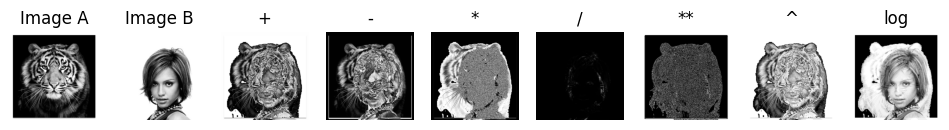

In [30]:
imageA = image2
imageB = image4

image1 = arithmetic_operator(imageA, imageB, operation="+")
image2 = arithmetic_operator(imageA, imageB, operation="-")
image3 = arithmetic_operator(imageA, imageB, operation="*")
image4 = arithmetic_operator(imageA, imageB, operation="/")
image5 = arithmetic_operator(imageA, imageB, operation="**")
image6 = arithmetic_operator(imageA, imageB, operation="^")
image7 = arithmetic_operator(imageA, imageB, operation="^^")
image8 = arithmetic_operator(imageA, imageB, operation="log")



fig, axs = plt.subplots(1, 9, figsize=(12, 4))

axs[0].imshow(imageA, cmap='binary')
axs[0].set_title('Image A')

axs[1].imshow(imageB, cmap='binary')
axs[1].set_title('Image B')

axs[2].imshow(image1, cmap='binary')
axs[2].set_title('+')

axs[3].imshow(image2, cmap='binary')
axs[3].set_title('-')

axs[4].imshow(image3, cmap='binary')
axs[4].set_title('*')

axs[5].imshow(image4, cmap='binary')
axs[5].set_title('/')

axs[6].imshow(image5, cmap='binary')
axs[6].set_title('**')

axs[7].imshow(image6, cmap='binary')
axs[7].set_title('^')

axs[8].imshow(image7, cmap='binary')
axs[8].set_title('^^')

axs[8].imshow(image8, cmap='binary')
axs[8].set_title('log')

for i in range(9):
  axs[i].axis('off')

plt.show()

# Operações Geométricas

In [31]:
def translate_image(img, x_shift, y_shift):
    rows, cols, c = img.shape
    M = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
    dst = cv2.warpAffine(img, M, (cols, rows))
    return dst

In [32]:
def resize_image(image, scale_factor=2):
    # Obter as dimensões da imagem original
    height, width, channels = image.shape
    
    # Definir as novas dimensões da imagem redimensionada
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)
    
    # Redimensionar a imagem usando a função cv2.resize
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
    
    return resized_image

In [33]:
def rotate_image(image, angle, scale=1.0):
    # Obter as dimensões da imagem original
    height, width, channels = image.shape
    
    # Definir a matriz de transformação para a rotação
    M = cv2.getRotationMatrix2D((width/2, height/2), angle, scale)
    
    # Realizar a rotação da imagem usando a função cv2.warpAffine
    rotated_image = cv2.warpAffine(image, M, (width, height))
    
    return rotated_image

In [34]:
def shear_image(image, shear_factor=0.5):
    # Obter as dimensões da imagem original
    height, width, channels = image.shape
    
    # Definir a matriz de transformação para o cisalhamento
    M = np.float32([[1, shear_factor, 0], [0, 1, 0], [0, 0, 1]])
    
    # Realizar o cisalhamento da imagem usando a função cv2.warpPerspective
    sheared_image = cv2.warpPerspective(image, M, (int(width*1.5), int(height*1.5)))
    
    return sheared_image


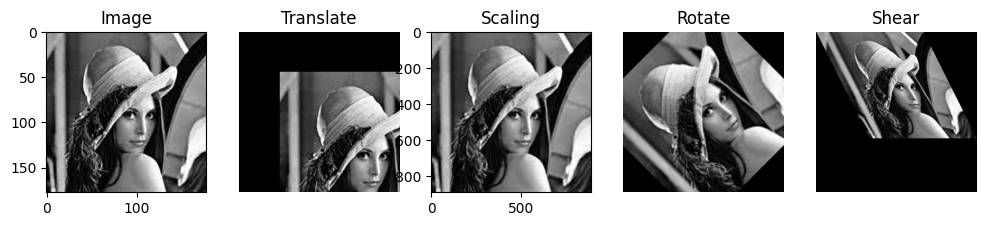

In [38]:
new_image = image.copy()

image_translate = translate_image(new_image, 45, 45)
image_resize = resize_image(new_image, 5)
image_rotate = rotate_image(new_image, 45, 1.0)
image_shear = shear_image(new_image, 0.5)

fig, axs = plt.subplots(1, 5, figsize=(12, 4))

axs[0].imshow(new_image, cmap='binary')
axs[0].set_title('Image')

axs[1].imshow(image_translate, cmap='binary')
axs[1].set_title('Translate')
axs[1].axis('off')

axs[2].imshow(image_resize, cmap='binary')
axs[2].set_title('Scaling')

axs[3].imshow(image_rotate, cmap='binary')
axs[3].set_title('Rotate')
axs[3].axis('off')

axs[4].imshow(image_shear, cmap='binary')
axs[4].set_title('Shear')
axs[4].axis('off')



plt.show()